**Julia Essentials**

[Quant Econ](https://julia.quantecon.org/getting_started_julia/julia_essentials.html)

May 19th 2020

Taisei Noda

* Common data types
* Iteration
* More on user-defined functions
* Comparisons and logic

In [1]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.6.0")
# uncomment to force package installation and precompilation
# github_project("QuantEcon/quantecon-notebooks-julia", version="0.6.0", instantiate=true, precompile = true)

Activated /Users/taisei/Project.toml
Info quantecon-notebooks-julia 0.5.0 activated, 0.6.0 requested


In [2]:
using LinearAlgebra, Statistics

# Common Data Types

## Primitive Data Types

In [3]:
x= true

true

In [4]:
typeof(x)

Bool

Same as python

In [5]:
typeof(1.0)

Float64

In [6]:
typeof(1)

Int64

In [8]:
x=2;y=1.0;

";" can be used to suppress output from a line of code. or to combine two lines of code together.

In [9]:
x*y

2.0

In [10]:
x^2

4

In [11]:
y/x

0.5

In [12]:
2x-3y

1.0

"*" can be omitted for multiplication

* @show Macro: display both expressions and code

In [14]:
@show 2x-3y
@show x+y;

2x - 3y = 1.0
x + y = 3.0


"im" denotes the imaginary part $i$

In [15]:
x = 1+2im

1 + 2im

In [16]:
y=1-2im

1 - 2im

In [17]:
x*y

5 + 0im

## Strings

In [18]:
x = "foobar"

"foobar"

In [20]:
typeof(x)

String

In [21]:
x=10;y=20

20

In [22]:
"x=$x"

"x=10"

In [23]:
"x+y=$(x+y)"

"x+y=30"

In [24]:
"foo"*"bar"

"foobar"

"string1"*"string2"="string1string2"

In [26]:
s="Charlie don't surf"

"Charlie don't surf"

In [27]:
split(s)

3-element Array{SubString{String},1}:
 "Charlie"
 "don't"
 "surf"

"split" splits a string into words by default.

In [28]:
replace(s,"surf"=>"ski")

"Charlie don't ski"

In [29]:
split("fee,fi,fo",",")

3-element Array{SubString{String},1}:
 "fee"
 "fi"
 "fo"

In [30]:
strip(" foobar ") #remove whitespace"

"foobar"

* Regular expressions

see [this](https://docs.julialang.org/en/v1/manual/strings/#Regular-Expressions-1) for more info.

In [31]:
match(r"(\d+)", "Top 10")  # find digits in string

RegexMatch("10", 1="10")

## Containers

* tuple

In [32]:
x = ("foo", "bar")
y = ("foo", 2)

("foo", 2)

In [33]:
typeof(x), typeof(y)

(Tuple{String,String}, Tuple{String,Int64})

In [34]:
x = "foo", 1

("foo", 1)

In [35]:
function f()
    return "foo", 1
end
f()

("foo", 1)

### Refrencing Items

In [36]:
x = [10, 20, 30, 40]

4-element Array{Int64,1}:
 10
 20
 30
 40

In [37]:
x[end]

40

In [38]:
x[end-1]

30

In [39]:
"foobar"[3:end]

"obar"

The unit is a letter for strings.

### Dictionaries

In [40]:
d = Dict("name" => "Frodo", "age" => 33)

Dict{String,Any} with 2 entries:
  "name" => "Frodo"
  "age"  => 33

In [41]:
d["age"]

33

The strings name and age are called the keys.

The keys are mapped to values (in this case "Frodo" and 33).

# Iterating

## Iterables

In [42]:
actions = ["surf", "ski"]
for action in actions
    println("Charlie doesn't $action")
end

Charlie doesn't surf
Charlie doesn't ski


In [43]:
for i in 1:3
    print(i)
end

123

* Dictionaries

In [44]:
d = Dict("name" => "Frodo", "age" => 33)

Dict{String,Any} with 2 entries:
  "name" => "Frodo"
  "age"  => 33

In [45]:
keys(d)

Base.KeySet for a Dict{String,Any} with 2 entries. Keys:
  "name"
  "age"

In [46]:
collect(keys(d))

2-element Array{String,1}:
 "name"
 "age"

## Looping without Indices

In [47]:
x_values = 1:5

1:5

In [48]:
for x in x_values
    println(x * x)
end

1
4
9
16
25


In [49]:
for i in eachindex(x_values)
    println(x_values[i] * x_values[i])
end

1
4
9
16
25


* zip: steps through pairs from two sequences

In [50]:
countries = ("Japan", "Korea", "China")
cities = ("Tokyo", "Seoul", "Beijing")
for (country, city) in zip(countries, cities)
    println("The capital of $country is $city")
end

The capital of Japan is Tokyo
The capital of Korea is Seoul
The capital of China is Beijing


* enumerate(): can be used if need the index as well as the value

In [51]:
countries = ("Japan", "Korea", "China")
cities = ("Tokyo", "Seoul", "Beijing")
for (i, country) in enumerate(countries)
    city = cities[i]
    println("The capital of $country is $city")
end

The capital of Japan is Tokyo
The capital of Korea is Seoul
The capital of China is Beijing


## Comprehensions []

In [52]:
doubles = [ 2i for i in 1:4 ]

4-element Array{Int64,1}:
 2
 4
 6
 8

In [53]:
animals = ["dog", "cat", "bird"];   # Semicolon suppresses output

In [54]:
plurals = [ animal * "s" for animal in animals ]

3-element Array{String,1}:
 "dogs"
 "cats"
 "birds"

In [55]:
[ i + j for i in 1:3, j in 4:6 ]

3×3 Array{Int64,2}:
 5  6  7
 6  7  8
 7  8  9

In [56]:
[ i + j + k for i in 1:3, j in 4:6, k in 7:9 ]

3×3×3 Array{Int64,3}:
[:, :, 1] =
 12  13  14
 13  14  15
 14  15  16

[:, :, 2] =
 13  14  15
 14  15  16
 15  16  17

[:, :, 3] =
 14  15  16
 15  16  17
 16  17  18

In [57]:
[ (i, j) for i in 1:2, j in animals]

2×3 Array{Tuple{Int64,String},2}:
 (1, "dog")  (1, "cat")  (1, "bird")
 (2, "dog")  (2, "cat")  (2, "bird")

In [58]:
[ (num = i, animal = j) for i in 1:2, j in animals]

2×3 Array{NamedTuple{(:num, :animal),Tuple{Int64,String}},2}:
 (num = 1, animal = "dog")  …  (num = 1, animal = "bird")
 (num = 2, animal = "dog")     (num = 2, animal = "bird")

# Comparisons and Logical Operators

In [59]:
x=1

1

In [60]:
x==2

false

In [61]:
x!=3

true

In [62]:
1+1E-8≈1

true

In [63]:
1+1E-8==1

false

In [64]:
true && false

false

In [65]:
true||false

true

# User-Defined Functions

Key features;
* Any number of functions can be defined in a given file.
* Any “value” can be passed to a function as an argument, including other functions.
* Functions can be (and often are) defined inside other functions.
* A function can return any kind of value, including functions.

## Return Statement

When no return statement is present, the last value is returned.

In [67]:
function f1(a, b)
    return a * b
end

function f2(a, b)
    a * b
end

f2 (generic function with 1 method)

In [68]:
function foo(x)
    if x > 0
        return "positive"
    end
    return "nonpositive"
end

foo (generic function with 1 method)

## Other Syntax for Defining Functions

In [72]:
f(x) = sin(1 / x)

f (generic function with 2 methods)

In [73]:
f(1 / pi)

1.2246467991473532e-16

* Define anonymous functions

In [74]:
map(x -> sin(1 / x), randn(3))  # apply function to each element

3-element Array{Float64,1}:
 -0.9897218993981082
  0.9285513655058839
 -0.16884230133774722

## Optional and Keyword Arguments

Keyword arguments are parsed and bounded **by name** rather than the order in the function call.

In [75]:
f(x, a = 1) = exp(cos(a * x))

f (generic function with 3 methods)

In [76]:
f(pi)

0.36787944117144233

In [77]:
f(pi,2)

2.718281828459045

In [78]:
f(2,pi)

2.718281828459045

In [79]:
f(x; a = 1) = exp(cos(a * x))  # note the ; in the definition

f (generic function with 3 methods)

In [80]:
f(pi, a = 2) # calling with ; is usually optional and generally discouraged

2.718281828459045

In [81]:
f(pi,2)

2.718281828459045

Why calling with ; is discouraged?

# Broadcasting

In [82]:
x_vec = [2.0, 4.0, 6.0, 8.0]
y_vec = similar(x_vec)
for (i, x) in enumerate(x_vec)
    y_vec[i] = sin(x)
end

Or alternatively (and more concisely)

In [83]:
y_vec = sin.(x_vec)

4-element Array{Float64,1}:
  0.9092974268256817
 -0.7568024953079282
 -0.27941549819892586
  0.9893582466233818

If "f" is any Julia function, then "f." references the broadcasted version.

In [84]:
function chisq(k)
    @assert k > 0
    z = randn(k)
    return sum(z -> z^2, z)  # same as `sum(x^2 for x in z)`
end

chisq (generic function with 1 method)

* @assert: check that the next expression evaluates to true, and will stop and display error otherwise.

In [85]:
chisq(-2)

AssertionError: AssertionError: k > 0

In [86]:
chisq.([2, 4, 6])

3-element Array{Float64,1}:
 4.239405914443263
 2.1501549170287806
 7.791888192551437

In [87]:
x = 1.0:1.0:5.0
y = [2.0, 4.0, 5.0, 6.0, 8.0]
z = similar(y)
z .= x .+ y .- sin.(x) # generates efficient code instead of many temporaries

5-element Array{Float64,1}:
  2.1585290151921033
  5.090702573174318
  7.858879991940133
 10.756802495307928
 13.958924274663138

* "similar()"

Create an uninitialized mutable array with the given element type and size, based upon the given source array. 

* @.

In [89]:
@. z = x + y - sin(x)

5-element Array{Float64,1}:
  2.1585290151921033
  5.090702573174318
  7.858879991940133
 10.756802495307928
 13.958924274663138

* Bivariate function

In [93]:
f(a, b) = a + b # bivariate function
a = [1 2 3]
b = [4 5 6]
@show f.(a, b) # across both
@show f.(a, 2); # fix scalar for second

f.(a, b) = [5 7 9]
f.(a, 2) = [3 4 5]


"Ref" is to fix a function parameter you do not want to broadcast over

In [94]:
f(x, y) = [1, 2, 3] ⋅ x + y   # "⋅" can be typed by \cdot<tab>
f([3, 4, 5], 2)   # uses vector as first parameter
f.(Ref([3, 4, 5]), [2, 3])   # broadcasting over 2nd parameter, fixing first

2-element Array{Int64,1}:
 28
 29

# Scoping and Closures

Be aware of differences in global environment of Jupyter and the REPL

Since global variables are usually a bad idea, we will concentrate on understanding the role of good local scoping practice. We have been careful to write the code so that the entire code could be copied inside of a function.

## Functions

In [96]:
f(x) = x^2  # local `x` in scope

# x is not bound to anything in this outer scope
y = 5
f(y)

25

Equivalently,

In [97]:
function g() # scope within the `g` function

    f(x) = x^2 # local `x` in scope

    # x is not bound to anything in this outer scope
    y = 5
    f(y)
end
g() # run the function

25

In [98]:
f(x) = x^2  # local `x` in scope

# x is not bound to anything in this outer scope
x = 5   # a different `x` than the local variable name
f(x)    # calling `f` with `x`

25

In [99]:
f(x; y = 1) = x + y  # `x` and `y` are names local to the `f` function
xval = 0.1
yval = 2
f(xval; y = yval)

2.1

In [100]:
f(x; y = 1) = x + y  # `x` and `y` are names local to the `f` function
x = 0.1
y = 2
f(x; y = y) # left hand `y` is the local name of the argument in the function

2.1

* Tuples

In [101]:
xval = 0.1
yval = 2
@show (x = xval, y = yval)  # named tuple with names `x` and `y`

x = 0.1
y = 2

# create a named tuple with names `x` and `y` local to the tuple, bound to the RHS `x` and `y`
(x = x, y = y)

(x = xval, y = yval) = (x = 0.1, y = 2)


(x = 0.1, y = 2)

As you use Julia, you will find that scoping is very natural and that there is no reason to avoid using x and y in both places

* Broadcasting

In [102]:
f(x) = x^2  # local `x` in scope

x = 1:5     # not an integer

f.(x)       # broadcasts the x^2 function over the vector

5-element Array{Int64,1}:
  1
  4
  9
 16
 25

## Closures

Calculate a value of a function given some fixed parameters.

In [103]:
f(x, a) = a * x^2

f(1, 0.2)

0.2

In [104]:
a = 0.2
f(x) = a * x^2     # refers to the `a` in the outer scope
f(1)               # univariate function

0.2

In [105]:
function g(a)
    f(x) = a * x^2  # refers to the `a` passed in the function
    f(1)            # univariate function
end
g(0.2)

0.2

A **closure** is simply a callable object with field names corresponding to captured variables.


The key here is not that "a" is a global variable, but rather that the "f" function is defined to capture a variable from an outer scope. 

It is generally bad practice to modify the captured variable in the function, but otherwise the code becomes very clear.

In [106]:
function solvemodel(x)
    a = x^2
    b = 2 * a
    c = a + b
    return (a = a, b = b, c = c)  # note local scope of tuples!
end

solvemodel(0.1)

(a = 0.010000000000000002, b = 0.020000000000000004, c = 0.030000000000000006)

## Higher-Order Functions

* Functions of functions and functions returning functions

In [107]:
twice(f, x) = f(f(x))  # applies f to itself twice
f(x) = x^2
@show twice(f, 2.0)

twice(x -> x^2, 2.0)
a = 5
g(x) = a * x
@show twice(g, 2.0);   # using a closure

twice(f, 2.0) = 16.0
twice(g, 2.0) = 50.0


g(x) is defined from an outer scope.

* Expectations.jl

In [108]:
using Expectations, Distributions

@show d = Exponential(2.0)

f(x) = x^2
@show expectation(f, d);  # E(f(x))

┌ Info: Precompiling Expectations [2fe49d83-0758-5602-8f54-1f90ad0d522b]
└ @ Base loading.jl:1260


d = Exponential(2.0) = Exponential{Float64}(θ=2.0)
expectation(f, d) = 8.00000000000004


In [109]:
function multiplyit(a, g)
    return x -> a * g(x)  # function with `g` used in the closure
end

f(x) = x^2
h = multiplyit(2.0, f)    # use our quadratic, returns a new function which doubles the result
h(2)     # returned function is like any other function

8.0

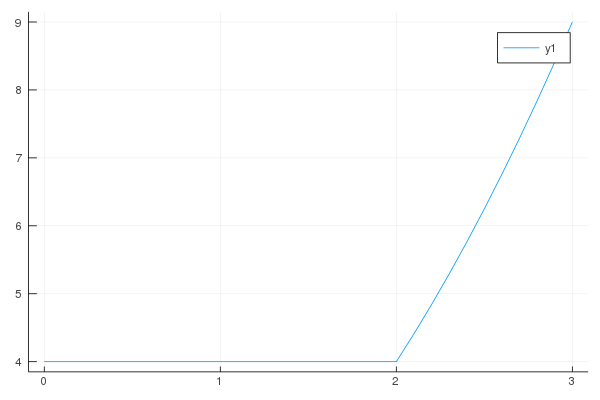

In [39]:
function snapabove(g, a)
    function f(x)
        if x > a         # "a" is captured in the closure f
            return g(x)
        else
            return g(a)
        end
    end
    return f    # closure with the embedded a
end

f(x) = x^2
h = snapabove(f, 2.0)

using Plots

gr(fmt=:png);
plot(h, 0.0:0.1:3.0)

## Loops

In [111]:
for i in 1:2  # introduces local i
    dval1 = i
    println(i)
end

# @show (i, dval1)  # would fail as neither exists in this scope

for i in 1:2  # introduces a different local i
    println(i)
end

1
2
1
2


In [112]:
dval2 = 0  # introduces variables
for i in 1:2   # introduces local i
    dval2 = i  # refers to outer variable
end

dval2 # still can't refer to `i`

2

In [113]:
val = 1.0
tol = 0.002
while val > tol
    old = val
    val = val / 2
    difference = val - old
end

@show val;
# @show difference fails, not in scope

val = 0.001953125


## A Quick Check for Scoping Design

In [114]:
x = 2.0
f(y) = x + y
z = f(4.0)

for i in 1:3
    z += i
end

println("z = $z")

z = 12.0


In [115]:
function wrapped()
    x = 2.0
    f(y) = x + y
    z = f(4.0)

    for i in 1:3
        z += i
    end

    println("z = $z")
end

wrapped()

z = 12.0


Note: there are no global variables there.

# Exercises

## Exercise 1

* Part 1

In [119]:
x_vals=[1,3,5]
y_vals=[2,4,6]
inner=zip(x_vals,y_vals)
inner

Base.Iterators.Zip{Tuple{Array{Int64,1},Array{Int64,1}}}(([1, 3, 5], [2, 4, 6]))

* Part 1 Solution 

In [120]:
x_vals=[1,3,5]
y_vals=[2,4,6]
sum(x*y for (x,y) in zip(x_vals,y_vals))

44

* Part 2 

In [126]:
sum([iseven(x) for x in 0:99])

50

* Part 2 Solution

In [125]:
sum(iseven,0:99)

50

Note: do not have to define "x".

* Part 3

In [131]:
pairs = ((2,5),(4,2),(9,8),(12,10))
sum(iseven(x)*iseven(y) for (x,y) in pairs)

2

* Part 3 Solution

In [132]:
pairs = ((2,5),(4,2),(9,8),(12,10))
sum(xy -> all(iseven,xy),pairs)

2

**REVIEW ANONYMOUS FUNCTION**

sum(z -> z^2, z)  # same as `sum(x^2 for x in z)`

## Exercise 2

In [147]:
function p(x,coeff)
    y=similar(coeff)
    for (i,a) in enumerate(coeff)
        y[i]=a*x^(i-1)
    end
    return sum(y)
end
p(2,[1,2,3])

17

* Solution

In [148]:
p(x,coeff)=sum(a*x^(i-1) for (i,a) in enumerate(coeff))

p (generic function with 1 method)

In [149]:
p(1,(2,4))

6

**for(i,a) in enumerate(coeff)**

## Exercise 3

In [154]:
function capital(string)
    c=0
    for letter in string
        if (letter == uppercase(letter))
            c +=1
        end
    end
    return c
end
capital("AppLe")

2

* Solution

In [155]:
function f_ex3(string)
    count = 0
    for letter in string
        if (letter == uppercase(letter)) && isletter(letter)
            count += 1
        end
    end
    return count
end

f_ex3("The Rain in Spain")

3

* isletter():check the letter is string

## Exercise 4

**NEED REVIEW**

* Solution

In [162]:
function f_ex4(seq_a, seq_b)
    is_subset = true
    for a in seq_a
        if a ∉ seq_b
            is_subset = false
        end
    end
    return is_subset
end

# test
println(f_ex4([1, 2], [1, 2, 3]))
println(f_ex4([1, 2, 3], [1, 2]))
    

true
false


In [163]:
f_ex4_2(seq_a, seq_b) = Set(seq_a) ⊆ Set(seq_b) # \subseteq (⊆) is unicode for `issubset`

println(f_ex4_2([1, 2], [1, 2, 3]))
println(f_ex4_2([1, 2, 3], [1, 2]))

true
false


## Exercise 5

In [67]:
function linapprox(f,a,b,n,x)
    point=range(a,b;step=(b-a)/(n-1))
    y = f(a)
    for i in 1:n
        if x>point[i]&&x<point[i+1]
            y=(f(point[i])*(point[i+1]-x)+f(point[i+1])*(x-point[i]))/(point[i+1]-point[i])
        end
    end
    if x==b
        y=f(b)
    end
    return y
end

linapprox (generic function with 2 methods)

Note: Devide by n-1 not by n

* Test

In [68]:
f(x)=x^2
g(x)=linapprox(f,-1,1,3,x)

g (generic function with 1 method)

  0.126751 seconds (251.22 k allocations: 11.748 MiB)


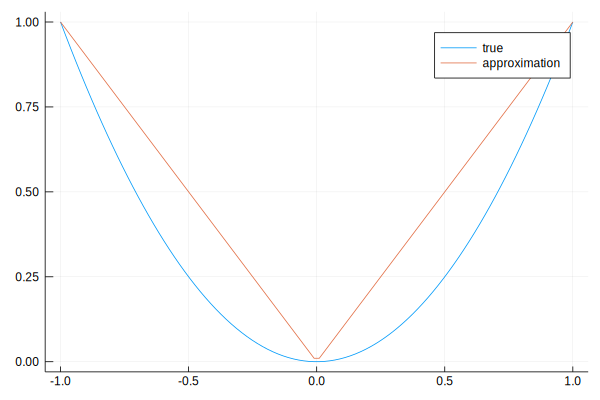

In [69]:
@time begin
x_grid = range(-1.0, 1.0, length = 100)
y_vals = f.(x_grid)
y = g.(x_grid)
plot(x_grid, y_vals, label = "true")
plot!(x_grid, y, label = "approximation")
end

* Solution

In [59]:
function linapprox_sol(f, a, b, n, x)
    # evaluates the piecewise linear interpolant of f at x,
    # on the interval [a, b], with n evenly spaced grid points.

    length_of_interval = b - a
    num_subintervals = n - 1
    step = length_of_interval / num_subintervals

    # find first grid point larger than x
    point = a
    while point ≤ x
        point += step
    end

    # x must lie between the gridpoints (point - step) and point
    u, v = point - step, point

    return f(u) + (x - u) * (f(v) - f(u)) / (v - u)
end

linapprox_sol (generic function with 1 method)

In [60]:
f(x)=x^2
g(x)=linapprox_sol(f,-1,1,3,x)

g (generic function with 1 method)

  0.043359 seconds (184.71 k allocations: 8.564 MiB)


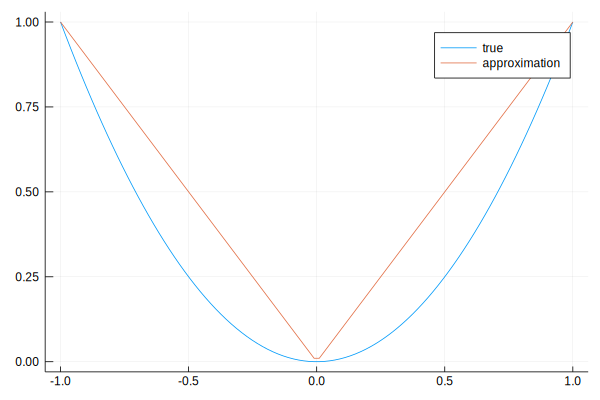

In [61]:
@time begin
x_grid = range(-1.0, 1.0, length = 100)
y_vals = f.(x_grid)
y = g.(x_grid)
plot(x_grid, y_vals, label = "true")
plot!(x_grid, y, label = "approximation")
end

* Takeaway

Define component explicitly.

## Exercise 6

In [83]:
open("us_cities.txt", "w") do f
  write(f,
"new york: 8244910
los angeles: 3819702
chicago: 2707120
houston: 2145146
philadelphia: 1536471
phoenix: 1469471
san antonio: 1359758
san diego: 1326179
dallas: 1223229")
end

167

In [86]:
us_cities=open("us_cities.txt","r")
total_pop=0
for line in eachline(us_cities)
    city, population=split(line,":")
    total_pop += parse(Int, population)
end
total_pop

23831986

* Solution

In [87]:
f_ex6 = open("us_cities.txt", "r")
total_pop = 0
for line in eachline(f_ex6)
    city, population = split(line, ':')  # tuple unpacking
    total_pop += parse(Int, population)
end
close(f_ex6)
println("Total population = $total_pop")

Total population = 23831986


* Takeaway

    * Tuple unpacking
    * Don't forget close the txt file

## Exercise 7

In [91]:
function linapprox_ex7(f, nodes, x)
    # find first grid point larger than x
    point=nodes[1]+((x-nodes[1])÷step(nodes))*step(nodes)
    # x must lie between the gridpoints (point - step) and point
    u, v = point,point+step(nodes)
    return f(u) + (x - u) * (f(v) - f(u)) / (v - u)
end

linapprox_ex7 (generic function with 1 method)

In [92]:
f_ex5(x) = x^2
g_ex7(x) = linapprox_ex7(f_ex5,nodes,x)

g_ex7 (generic function with 1 method)

  0.061799 seconds (193.42 k allocations: 8.992 MiB)


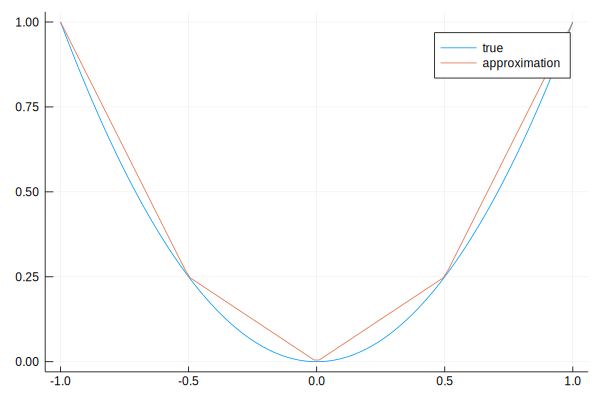

In [93]:
@time begin
x_grid = range(-1.0, 1.0, length = 100)
y_vals = f_ex5.(x_grid)
y = g_ex7.(x_grid)
plot(x_grid, y_vals, label = "true")
plot!(x_grid, y, label = "approximation")
end

* Seems room to improve the performance